<a href="https://colab.research.google.com/github/ABBU2712/Open-Source-Kornia/blob/main/Tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Load Image

In [2]:
%%capture
!wget https://github.com/kornia/data/raw/main/simba.png

In [3]:
from matplotlib import pyplot as plt
import cv2
import numpy as np


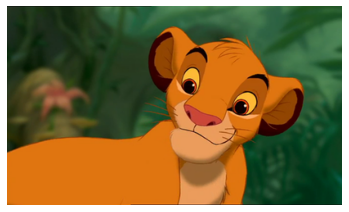

In [4]:
img_bgr: np.array = cv2.imread('simba.png', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

In [5]:
%%capture
!pip install kornia

In [6]:
import torch
import kornia as K
import torchvision

/usr/local/lib/python3.7/dist-packages/kornia/augmentation/augmentation.py:1833: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,


In [7]:
x_bgr: torch.Tensor = K.image_to_tensor(img_bgr)

In [8]:
x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)

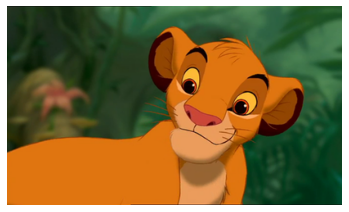

In [9]:
img_np: np.array = K.tensor_to_image(x_rgb)
plt.imshow(img_np); plt.axis('off');

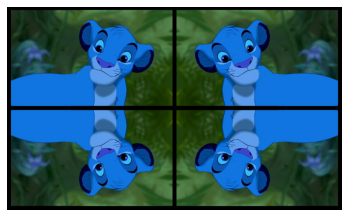

In [14]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=10)
    out_np: np.array = K.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

# create a batch of images
xb_bgr = torch.stack([x_bgr, K.hflip(x_bgr), K.vflip(x_bgr), K.rot180(x_bgr)])
imshow(xb_bgr)

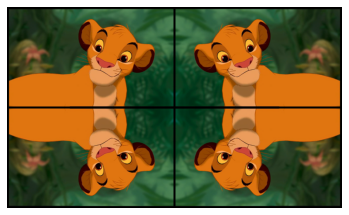

In [11]:
# convert to back to RGB
xb_rgb = K.color.bgr_to_rgb(xb_bgr)
imshow(xb_rgb)

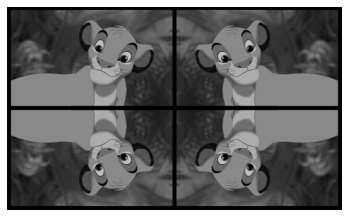

In [15]:
# convert to grayscale
# NOTE: image comes in torch.uint8, and kornia assumes floating point type
xb_gray = K.color.rgb_to_grayscale(xb_rgb.float() / 255.)
imshow(xb_gray)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


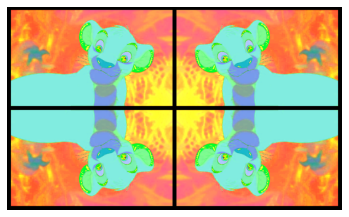

In [16]:
# convert to HSV
xb_hsv = K.color.rgb_to_hsv(xb_rgb.float() / 255.)
imshow(xb_hsv)